In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = -0.01
tau = 0.05
sigma = 10

In [2]:
ns = np.arange(1,1e6, 1e3)

In [3]:
d = (mu - 1.96*sigma/np.sqrt(ns))/np.sqrt(tau**2 + sigma**2/ns)
pvalue_prod = mu*norm.cdf(d) + tau**2/(np.sqrt(tau**2 + sigma**2/ns))*norm.pdf(d)

def pvalue_prod_fcn(n):
  d = (mu - 1.96*sigma/np.sqrt(n))/np.sqrt(tau**2 + sigma**2/n)
  return mu*norm.cdf(d) + tau**2/(np.sqrt(tau**2 + sigma**2/n))*norm.pdf(d)

In [4]:
_ = (mu + mu*sigma**2/(tau**2*ns))/np.sqrt(tau**2 + sigma**2/ns)
prod = mu*norm.cdf(_) + tau**2/(np.sqrt(tau**2 + sigma**2/ns))*norm.pdf(_)

def prod_fcn(n):
  _ = (mu + mu*sigma**2/(tau**2*n))/np.sqrt(tau**2 + sigma**2/n)
  return mu*norm.cdf(_) + tau**2/(np.sqrt(tau**2 + sigma**2/n))*norm.pdf(_)

Text(0, 0.5, 'Expected Metric Gain')

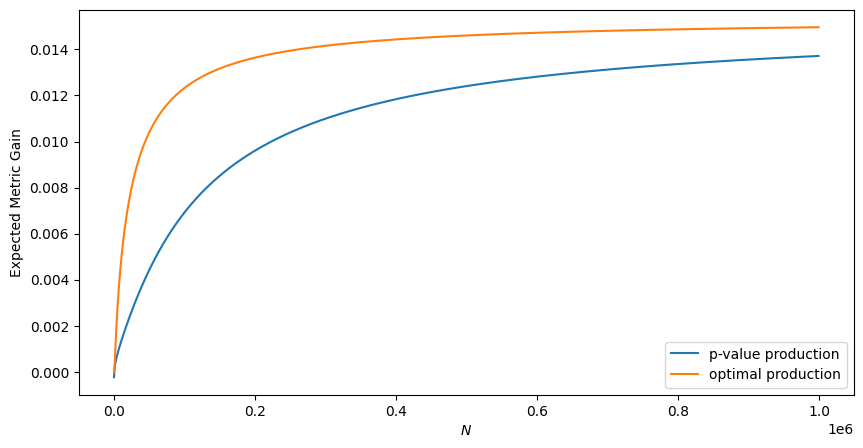

In [5]:
plt.figure(figsize = (10,5))

plt.plot(ns, pvalue_prod, label = "p-value production")
plt.plot(ns, prod, label = "optimal production")
plt.legend()

plt.xlabel('$N$')
plt.ylabel('Expected Metric Gain')


## Solve the Dynamic Programming

In [6]:
I = 20; N = 1_000
data = np.zeros((I,N))
min_size = 1_000

### Compute F(1,min_step)

helper_data = np.zeros((I,min_size + 1))
helper_data[1,1:] = prod_fcn(np.arange(1,min_size+1))

for i in range(1,I):
  for n in range(2,min_size + 1):
    helper_data[i,n] = max(helper_data[i-1,:(n+1)][::-1] + helper_data[1,:(n+1)])

### Compute with min step size

# this is min_size many people
data[:,1] = helper_data[:,min_size]
data[1,1:] = prod_fcn(min_size*np.arange(1,N))

for i in range(1,I):
  for n in range(2,N):
    data[i,n] = max(data[i-1,:(n+1)][::-1] + data[1,:(n+1)])

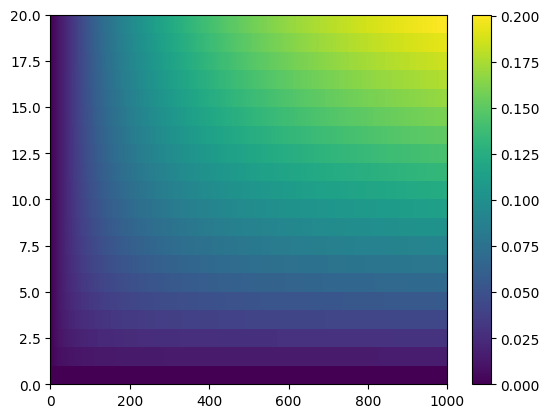

In [7]:
plt.pcolormesh(data, cmap='viridis')
plt.colorbar()

In [8]:
I = 20; N = 1_000
pval_data = np.zeros((I,N))
min_size = 1_000

### Compute F(1,min_step)

helper_data = np.zeros((I,min_size + 1))
helper_data[1,1:] = pvalue_prod_fcn(np.arange(1,min_size+1))

for i in range(1,I):
  for n in range(2,min_size + 1):
    helper_data[i,n] = max(helper_data[i-1,:(n+1)][::-1] + helper_data[1,:(n+1)])

### Compute with min step size

# this is min_size many people
pval_data[:,1] = helper_data[:,min_size]
pval_data[1,1:] = pvalue_prod_fcn(min_size*np.arange(1,N))

for i in range(1,I):
  for n in range(2,N):
    pval_data[i,n] = max(pval_data[i-1,:(n+1)][::-1] + pval_data[1,:(n+1)])

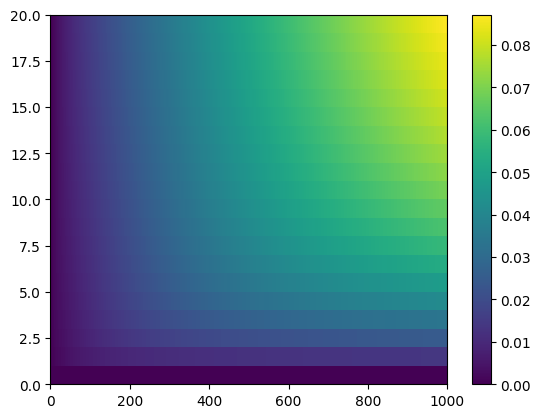

In [9]:
plt.pcolormesh(pval_data, cmap='viridis')
plt.colorbar()

<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
/var/folders/gc/wdmtwr2d6zd6mgxqyn23rjmc0000gn/T/ipykernel_50052/1145013615.py:20: SyntaxWarning: invalid escape sequence '\m'
  ax0.plot(ns/1000, 100*prod, label="$\mathbb{E}[\Delta | \widehat{\Delta}] > 0$ decision", color = 'red')
/var/folders/gc/wdmtwr2d6zd6mgxqyn23rjmc0000gn/T/ipykernel_50052/1145013615.py:30: RuntimeWarning: invalid value encountered in divide
  mesh = ax1.contourf(np.nan_to_num((data - pval_data) / data)[1:, :], levels=50, cmap='inferno')


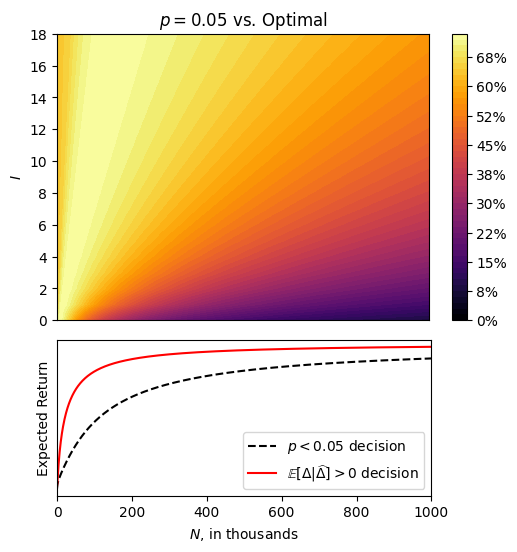

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec


plt.rcParams.update({'font.size': 10})

# Create a figure with specific gridspec layout
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.15)

# Create subplots based on gridspec
ax1 = plt.subplot(gs[0])  # Upper subplot for line plots
ax0 = plt.subplot(gs[1])  # Lower subplot for contour plot

# Plot the line plots in the upper subplot
ax0.plot(ns/1000, 100*pvalue_prod, label="$p < 0.05$ decision", color = 'black', linestyle = 'dashed',)
ax0.plot(ns/1000, 100*prod, label="$\mathbb{E}[\Delta | \widehat{\Delta}] > 0$ decision", color = 'red')
ax0.legend()
ax0.set_xlabel('$N$, in thousands')
ax0.set_ylabel('Expected Return')
ax0.set_xlim([0,1000])
ax0.set_yticks([])

ax0.set_position([0.125, 0.11, 0.624, 0.26])

# Plot the contour plot in the lower subplot
mesh = ax1.contourf(np.nan_to_num((data - pval_data) / data)[1:, :], levels=50, cmap='viridis')
colorbar = plt.colorbar(mesh, ax=ax1, orientation='vertical')

# Define a formatter function to convert values to percentages
def percentage_formatter(x, pos):
    return f'{x * 100:.0f}%'

# Apply the percentage formatter to the colorbar
colorbar.formatter = FuncFormatter(percentage_formatter)
colorbar.update_ticks()  # Refresh the colorbar labels

# Add labels and title to the contour plot
ax1.set_title('$p = 0.05$ vs. Optimal')
ax1.set_ylabel('$I$')
ax1.set_xticks([])


plt.savefig('../../figures/pvalue_comparison.pdf',bbox_inches='tight')
# Show the plot
plt.show()
